In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from collections import Counter
import pandas as pd

In [2]:
# --- Step 1: Create a Financial Network ---
G = nx.DiGraph()

# Add nodes (participants)
nodes = ['NYSE', 'NASDAQ', 'Citadel', 'Retail_1', 'Retail_2', 'HedgeFund_1']
G.add_nodes_from(nodes)

# Add weighted edges (likelihood of flow)
edges = [
    ('Retail_1', 'Citadel', 0.8),
    ('Retail_2', 'Citadel', 0.6),
    ('Citadel', 'NYSE', 0.9),
    ('Citadel', 'NASDAQ', 0.7),
    ('HedgeFund_1', 'NYSE', 0.5),
    ('HedgeFund_1', 'NASDAQ', 0.5)
]
for u, v, w in edges:
    G.add_edge(u, v, weight=w)



In [3]:
# --- Step 2: Flow Simulation Function ---
def simulate_flow(source, G):
    path = [source]
    current = source
    while True:
        neighbors = list(G.successors(current))
        if not neighbors:
            break
        probs = [G[current][n]['weight'] for n in neighbors]
        total = sum(probs)
        probs = [p / total for p in probs]
        current = random.choices(neighbors, weights=probs)[0]
        path.append(current)
    return path



In [4]:
# --- Step 3: Simulate Many Flows and Count Edge Usage ---
path_counter = Counter()
num_simulations = 500

for _ in range(num_simulations):
    path = simulate_flow('Retail_1', G)
    for i in range(len(path) - 1):
        edge = (path[i], path[i+1])
        path_counter[edge] += 1



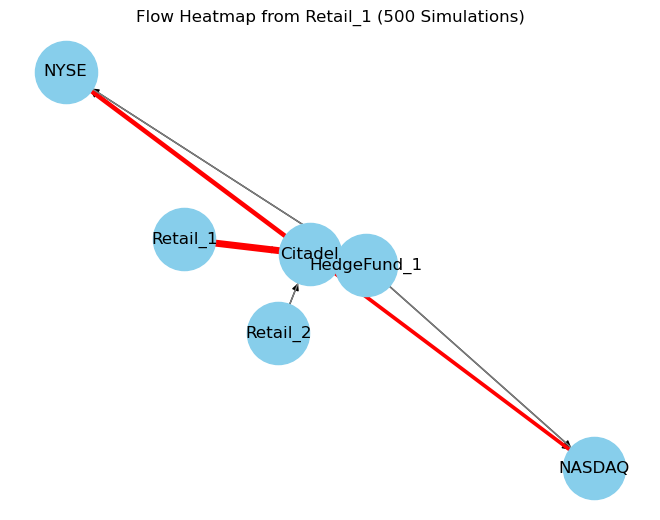

In [5]:
# --- Step 4: Visualize the Network with Flow Heatmap ---
max_count = max(path_counter.values(), default=1)

edge_colors = []
edge_widths = []

for u, v in G.edges():
    count = path_counter.get((u, v), 0)
    edge_colors.append('red' if count > 0 else 'gray')
    edge_widths.append(1 + 4 * (count / max_count))  # scale width 1–5

pos = nx.spring_layout(G, seed=42)  # Consistent layout
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000)
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=edge_widths)
plt.title(f"Flow Heatmap from Retail_1 ({num_simulations} Simulations)")
plt.show()



In [6]:
# --- Step 5: Export Flow Data ---
flow_df = pd.DataFrame.from_dict(path_counter, orient='index', columns=['Flow Count'])
flow_df.index = flow_df.index.map(lambda x: f"{x[0]} → {x[1]}")
flow_df.sort_values('Flow Count', ascending=False).to_csv("flow_summary.csv")

print("\nTop 5 Most Frequent Flow Paths:")
print(flow_df.sort_values('Flow Count', ascending=False).head())



Top 5 Most Frequent Flow Paths:
                    Flow Count
Retail_1 → Citadel         500
Citadel → NYSE             288
Citadel → NASDAQ           212


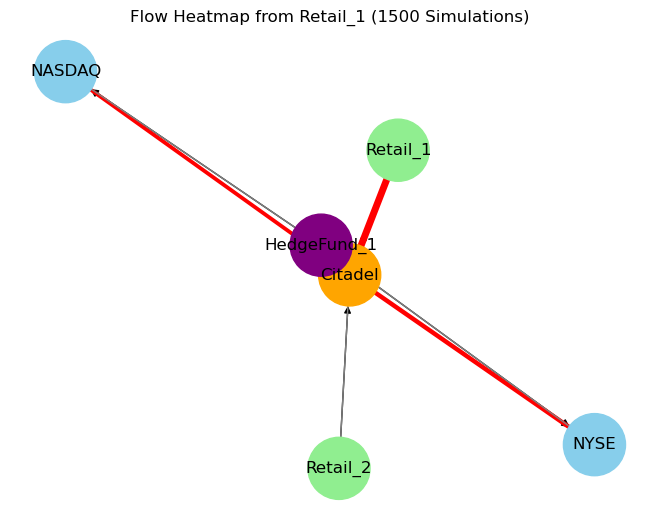


Top 5 Most Frequent Flow Paths:
                    Flow Count
Retail_1 → Citadel        1500
Citadel → NYSE             836
Citadel → NASDAQ           664


In [8]:
# --- 📍Step 1: Define Participants and Add Them to the Graph ---
participants = {
    'Retail_1': {'type': 'Retail', 'volume_capacity': 1000, 'latency': 0.01},
    'Retail_2': {'type': 'Retail', 'volume_capacity': 800, 'latency': 0.015},
    'Citadel': {'type': 'Market Maker', 'volume_capacity': 5000, 'latency': 0.005},
    'HedgeFund_1': {'type': 'Institution', 'volume_capacity': 2000, 'latency': 0.02},
    'NYSE': {'type': 'Exchange', 'volume_capacity': 10000, 'latency': 0.001},
    'NASDAQ': {'type': 'Exchange', 'volume_capacity': 9000, 'latency': 0.001}
}

# Add nodes with attributes
G = nx.DiGraph()
G.add_nodes_from([(node, attr) for node, attr in participants.items()])

# --- 📍Step 2: Add Weighted Edges (same as before) ---
edges = [
    ('Retail_1', 'Citadel', 0.8),
    ('Retail_2', 'Citadel', 0.6),
    ('Citadel', 'NYSE', 0.9),
    ('Citadel', 'NASDAQ', 0.7),
    ('HedgeFund_1', 'NYSE', 0.5),
    ('HedgeFund_1', 'NASDAQ', 0.5)
]
for u, v, w in edges:
    G.add_edge(u, v, weight=w)

# --- 📍Step 3: Simulate Flow ---
def simulate_flow(source, G):
    path = [source]
    current = source
    while True:
        neighbors = list(G.successors(current))
        if not neighbors:
            break
        probs = [G[current][n]['weight'] for n in neighbors]
        total = sum(probs)
        probs = [p / total for p in probs]
        current = random.choices(neighbors, weights=probs)[0]
        path.append(current)
    return path

# --- 📍Step 4: Run Many Simulations and Count Edge Usage ---
path_counter = Counter()
num_simulations = 1500

for _ in range(num_simulations):
    path = simulate_flow('Retail_1', G)
    for i in range(len(path) - 1):
        edge = (path[i], path[i+1])
        path_counter[edge] += 1

# --- 📍Step 5: Visualize Network with Participant Type Colors ---
# Map participant types to colors
color_map = {
    'Retail': 'lightgreen',
    'Market Maker': 'orange',
    'Exchange': 'skyblue',
    'Institution': 'purple'
}
node_colors = [color_map[G.nodes[n]['type']] for n in G.nodes()]

# Edge color and width by usage
max_count = max(path_counter.values(), default=1)
edge_colors = []
edge_widths = []

for u, v in G.edges():
    count = path_counter.get((u, v), 0)
    edge_colors.append('red' if count > 0 else 'gray')
    edge_widths.append(1 + 4 * (count / max_count))  # scale width 1–5

# Layout and plot
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=2000)
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=edge_widths)
plt.title(f"Flow Heatmap from Retail_1 ({num_simulations} Simulations)")
plt.show()

# --- 📍Step 6: Export Results ---
flow_df = pd.DataFrame.from_dict(path_counter, orient='index', columns=['Flow Count'])
flow_df.index = flow_df.index.map(lambda x: f"{x[0]} → {x[1]}")
flow_df.sort_values('Flow Count', ascending=False).to_csv("flow_summary.csv")

print("\nTop 5 Most Frequent Flow Paths:")
print(flow_df.sort_values('Flow Count', ascending=False).head())
